<div style="text-align: center; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 24px;">
    <h1>
        SIMULAÇÃO COMPUTACIONAL DE SÍNTESE DE IMAGENS EM RADIOASTRONOMIA
    </h1>
</div>
<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    <h2>
        Introdução
    </h2>
    <p style="text-indent: 2em;">
        A síntese de imagens astronômicas usando frequências de rádio é o principal fundamento da radioastronomia.
        Essa prática apresenta uma série de vantagens em comparação à produção de imagens em outras faixas do espectro eletromagnético como, por exemplo, o nível reduzido de interferência atmosférica. Uma das técnicas mais comuns de síntese de imagens na radioastronomia é a interferometria, que consiste na análise de um objeto no espaço utilizando um arranjo de dezenas ou até centenas de radiotelescópios.
    <p style="text-indent: 2em;">
        Na prática, esses radiotelescópios são antenas parabólicas com grandes refletores (tipicamente de 5 a 28 metros de diâmetro), operando com altos ganhos. Nesse contexto, um interferômetro é um dispositivo que correlaciona duas ou mais antenas desse tipo, medindo a diferença de fase das ondas eletromagnéticas que incidem sobre as antenas individuais em um instante de tempo. A medida obtida por um interferômetro a partir das diferenças de fase é chamada de visibilidade ou coerência espacial.
    <p style="text-indent: 2em;">
        Sendo assim, o programa neste arquivo explora a síntese de imagens na radioastronomia, exibindo algoritmos comuns da área, levando em conta parâmetros reais das antenas, do arranjo e do espaço.
    </p>
    <h2>
        Objetivo
    </h2>
    <p style="text-indent: 2em;">
        A motivação principal para a elaboração desse programa foi a produção de uma ferramenta na linguagem de programação python que
        seja capaz de realizar cálculos e produzir gráficos comuns de radioastronomia. Para isso, o método de síntese adotado foi o de análise de fase por Transformada de Fourier. Portanto, o programa começa na seção 1, onde o usuário conduz o projeto de um arranjo de antenas. Em seguida, na seção 2 a fonte de radiação eletromagnética é definida e ocorre o cálculo da função de visibilidade. Por fim, a seção 3 cobre a produção das imagens.
    <p style="text-indent: 2em;">
            Os códigos são exibidos de forma didática em um notebook jupyter que facilita a compreensão do processo abordado, porém eles 
        podem ser facilmente integrados a um projeto dedicado de radioastronomia com dados reais. Vale ressaltar também as 4 bibliotecas principais utilizadas:
        <ul>
            <li>Numpy: cálculos numéricos.</li>
            <li>Matplotlib: produção de gráficos.</li>
            <li>Scipy: simulação de terreno.</li>
            <li>Pillow: manipulação de arquivos de imagem.</li>
        </ul>
    </p>
</div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    <h2>
        1 - Projeto do Arranjo
    </h2>
    <h4>
        1.1 - Posição das Antenas na Superfície da Terra
    </h4>
    <p style="text-indent: 2em;">
        Primeiramente, um contexto teórico: o sistema de coordenadas utilizado é dividido em 3 partes, sendo elas o espaço tridimensional
        cartesiano usado para determinar as posições das antenas na superfície da Terra; o espaço (u, v, w) no domínio da frequência espacial, onde w aponta para o 'phase tracking center' no domínio angular do céu (o qual geralmente corresponde ao centro do objeto analisado) com o plano uv normal a w; e o sistema (l, m, n), que abriga a representação da intensidade observada <i>I</i>(l,m) da fonte. A relação entre esses sistemas é demonstrada na figura a seguir:
    <div style="text-align: center;">
        <img src="sistema de coordenadas.png" width="600" height="500" alt="Sistema de coordenadas">
    </div>
    <div style="text-align: right; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 14px;">
        Fonte: 'CORNWELL, T. J. Synthesis Imaging in Radio Astronomy II. In: TAYLOR, G. B.; CARILLI, C. L.; PERLEY, R. A. (eds.). San Francisco: ASP Conference Series, v. 180, 1999. Cap. 2, p. 20.'
    </div>
    <p style="text-indent: 2em;">
        A forma dos radiotelescópios no espaço tridimensional determina os pontos nos quais a visibilidade <i>V </i>(u, v) será amostrada. 
        Mais especificamente, um vetor de 'baseline' determinado pela posição de duas antenas traça um caminho elíptico durante a rotação da Terra, cujos pontos constituintes delimitam a função generalizada de amostragem <i>S </i>(u, v) (o papel de cada uma dessas funções torna-se mais claro ao longo desse arquivo). No seguinte código, as posições das antenas são escolhidas em coordenadas cartesianas e depois são obtidas as distâncias entre cada antena ao longo dos 3 eixos (x, y, z).
</div>

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    <h5>
        1.1.1 - Arranjos no Plano xy:
    </h5>
    <p style="text-indent: 2em;">
        As três funções abaixo criam um arranjo em formato de 'Y', um arranjo de anéis concêntricos e um arranjo de posições aleatórias respectivamente. Essas funções não calculam os componentes Z das coordenadas desses arranjos, estes serão adicionados posteriormente quando o terreno das antenas for modelado.
</div>

In [4]:
# Função que cria um arranjo em forma de Y planar onde n é o número de antenas em um ramo do Y e 
# l é o comprimento dos eixos do plano xy onde ficam as antenas.
def arranjo_Y(n, l):
    coords_antenas = []
    l_og = l # l original. l seguinte pode ser pensado como l * 1/2 * 3/5.
    l = l * 3/10 # l dimensionado para ser compatível com o tamanho do filtro gaussiano e não distanciar-se muito do centro do plano xy.

    for i in range(n):
        coords_antenas.append((-(l-l*(i/n)) + l_og/2, l-l*(i/n) + l_og/2))
        coords_antenas.append((l-l*(i/n) + l_og/2, l-l*(i/n) + l_og/2))
        coords_antenas.append((l_og/2, -np.sqrt(2 * (-l+l*(i/n))**2) + l_og/2))
    return coords_antenas


# Função que cria um arranjo de três anéis concentricos, onde n é o número de antenas no anel externo e
# l é o comprimento dos eixos do plano xy onde ficam as antenas.
def arranjo_circular(n, l):
    coords_antenas = []
    l_og = l
    l = l * 3/10                                # Raio do círculo externo.

    for i in range(n):                          # Círculo externo.
        theta = 2 * np.pi * i/n
        x = 1.2 * l * np.cos(theta) + l_og/2
        y = 1.2 * l * np.sin(theta) + l_og/2
        coords_antenas.append((x, y))
    l = l - l / 3                               # Novo raio.

    n -= 2                                      # Próximo círculo possui 2 antenas a menos.
    for i in range(n):                          # Círculo do meio.
        theta = 2 * np.pi * i/n
        x = 1.2 * l * np.cos(theta) + l_og/2
        y = 1.2 * l * np.sin(theta) + l_og/2
        coords_antenas.append((x, y))
    l = l - l / 3

    n -=2
    for i in range(n):                          # Círculo interno.
        theta = 2 * np.pi * i/n
        x = 1.2 * l * np.cos(theta) + l_og/2
        y = 1.2 * l * np.sin(theta) + l_og/2
        coords_antenas.append((x, y))
    return coords_antenas


# Função que cria um arranjo aleatório onde n é o número de antenas no arranjo 
# l é o comprimento dos eixos do plano xy onde ficam as antenas.
def arranjo_aleatorio(n, l):
    l_og = l
    l = l * 3/10
    coords_antenas = l_og * 0.7 * np.random.rand(n, 2) + (l_og * 0.15, l_og * 0.15)
    return coords_antenas

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    <h5>
        1.1.2 - Modelagem do Terreno (Altitudes Relativas de xy):
    </h5>
    <p style="text-indent: 2em;">
        Aqui é simulado um terreno levemente ondulado que determina as altitudes relativas (componentes z) das antenas, por meio de uma dispersão aleatória no plano xy que é suavizada por um filtro gaussiano:
</div>

In [5]:
from scipy.ndimage import gaussian_filter

l   = 600  # Comprimento do eixo do plano xy das antenas
res = 100  # Resolução do particionamento do plano xy das antenas

# Arranjo em formato de 'Y' com 15 antenas, centrado no plano xy das antenas:
arranjo_1 = np.array(arranjo_Y(10, l))        # Pontos do arranjo na forma ([x0, y0], [x1, y1], [x2, ys] ... [xn, yn])
arranjo_1_t = np.transpose(arranjo_1)         # Pontos do arranjo tranpostos para a forma ([x0, x1, x2 ... xn], [y0, y1, y2 ... yn])

arranjo_2 = np.array(arranjo_circular(10, l)) # Arranjo de anéis concêntricos com 18 antenas no total.
arranjo_2_t = np.transpose(arranjo_2)

arranjo_3 = np.array(arranjo_aleatorio(30, l)) # Arranjo de 20 antenas dispostas aleatoriamente.
arranjo_3_t = np.transpose(arranjo_3)

# Simulação de um terreno levemente 'ondulado' que determina a altitude relativa das antenas:
Z = np.random.rand(l, l)
Z = gaussian_filter(Z, sigma=50)

# Obtenção das coordenadas Z das antenas, baseadas nos seus posicionamentos no terreno.
arr_1_z = []
for i in range(len(arranjo_1_t[0])):
    arr_1_z.append(Z[round(arranjo_1_t[1][i])][round(arranjo_1_t[0][i])])

arr_2_z = []
for i in range(len(arranjo_2_t[0])):
    arr_2_z.append(Z[round(arranjo_2_t[1][i])][round(arranjo_2_t[0][i])])

arr_3_z = []
for i in range(len(arranjo_3_t[0])):
    arr_3_z.append(Z[round(arranjo_3_t[1][i])][round(arranjo_3_t[0][i])])

# Incluindo coordenadas z nas coordenadas dos arranjos
arranjo_1_t = np.append(arranjo_1_t, arr_1_z).reshape(3, len(arranjo_1))
arranjo_2_t = np.append(arranjo_2_t, arr_2_z).reshape(3, len(arranjo_2))
arranjo_3_t = np.append(arranjo_3_t, arr_3_z).reshape(3, len(arranjo_3))

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    <h5>
        1.1.3 - Visualização dos Arranjos no Terreno:
    </h5>
</div>

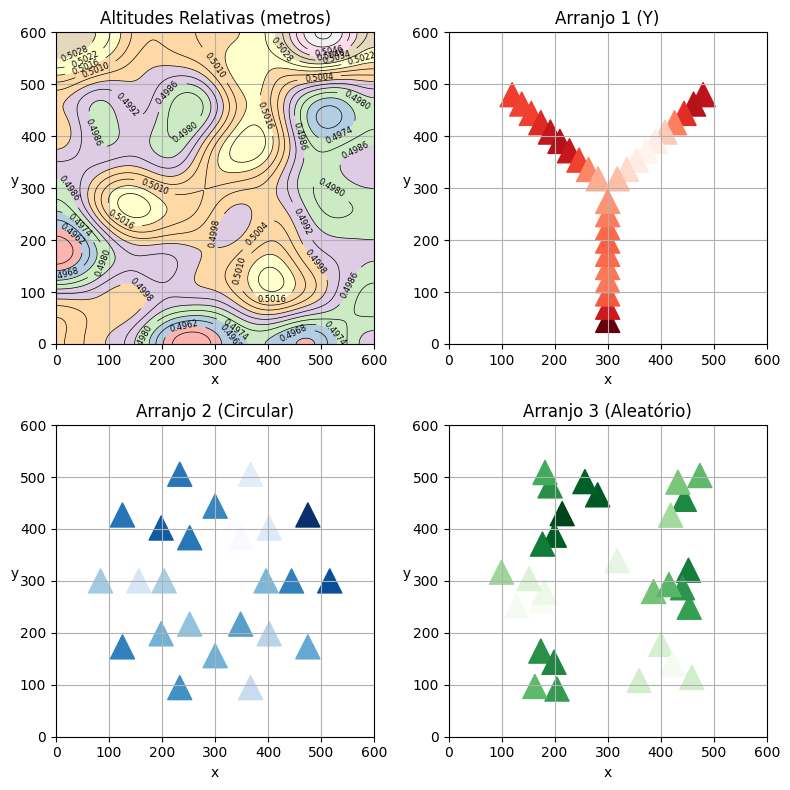

In [6]:
# Plot do terreno e dos arranjos. Nos plots dos arranjos, cores mais claras indicam altitudes maiores.
# Todos os arranjos compartilham o mesmo terreno.
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

contorno = axs[0][0].contour(Z,20, linewidths=0.5,colors='k') # Plota as curvas de nível.
axs[0][0].contourf(Z, 20, cmap='Pastel1') # Preenche os níveis com cores adequadas.
axs[0][0].clabel(contorno, inline=2, fontsize=6) # Plota a altitude associada a cada cor no mapa de cores.
axs[0][1].scatter(arranjo_1_t[0],arranjo_1_t[1], c = arranjo_1_t[2], marker='^', cmap='Reds_r',   s=l/2)
axs[1][0].scatter(arranjo_2_t[0],arranjo_2_t[1], c = arranjo_2_t[2], marker='^', cmap='Blues_r',  s=l/2)
axs[1][1].scatter(arranjo_3_t[0],arranjo_3_t[1], c = arranjo_3_t[2], marker='^', cmap='Greens_r', s=l/2)

for i in range (2):
    for j in range(2):
        axs[i][j].set_xlim(0, l)
        axs[i][j].set_ylim(0, l)
        if ((i, j) == (0, 0)): axs[i][j].set_title("Altitudes Relativas (metros)")
        if ((i, j) == (0, 1)): axs[i][j].set_title("Arranjo 1 (Y)")
        if ((i, j) == (1, 0)): axs[i][j].set_title("Arranjo 2 (Circular)")
        if ((i, j) == (1, 1)): axs[i][j].set_title("Arranjo 3 (Aleatório)")
        axs[i][j].set_xlabel('x')
        axs[i][j].set_ylabel('y', rotation=1)
        axs[i][j].grid(True)

plt.tight_layout()
plt.show()

In [7]:
# Habilita ou não eixo Z: 
eixo_z = True

if not (eixo_z):
    arranjo_1_t[2] = 0
    arranjo_2_t[2] = 0
    arranjo_3_t[2] = 0
# Alguns parâmetros , como esse, terão a opção de serem desabilitados. Caso a imagem final esteja pouco reconhecível, a desabilitação
# desses parâmetros pode aumentar sua qualidade.

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    <h5>
        1.1.4 - Distâncias Entre as Antenas em Cada Eixo:
    </h5>
    <p style="text-indent: 2em;">
        Será considerado o arranjo 1 (Y) de agora em diante.
</div>

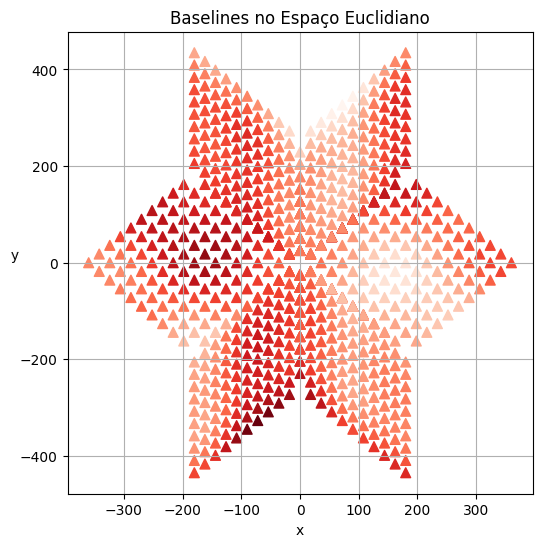

In [8]:
# Distância entre as antena em cada eixo do espaço cartesiano:
Lx = []
Ly = []
Lz = []
coords_antenas = arranjo_1_t
n_antenas = len(coords_antenas[0])

# São adicionadas as distâncias positivas e negativas entre as antenas em cada eixo 
# (não necessariamente nessa ordem) para que sejam consideradas todas as baselines.
i = 0
while (i < n_antenas):
    j = i + 1
    while (j < n_antenas):
        dif_antenas_X = coords_antenas[0][i] - coords_antenas[0][j]
        Lx.append(dif_antenas_X), Lx.append( -dif_antenas_X) 
        dif_antenas_Y = coords_antenas[1][i] - coords_antenas[1][j]
        Ly.append(dif_antenas_Y), Ly.append( -dif_antenas_Y)
        dif_antenas_Z = coords_antenas[2][i] - coords_antenas[2][j]
        Lz.append(dif_antenas_Z), Lz.append( -dif_antenas_Z)
        j += 1
    i += 1
i = j = 0

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(Lx, Ly, c=Lz, cmap='Reds_r', marker='^', s=50)
ax.set_title("Baselines no Espaço Euclidiano")
ax.set_xlabel('x')
ax.set_ylabel('y', rotation=1)
ax.grid(True)
plt.show()

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    <h4>
        1.2 - Baselines no Plano uv
    </h4>
    <p style="text-indent: 2em;">
        Para que as transformadas sejam realizadas posteriormente, as baselines precisam ser expressas como projeções no plano uv medidas
        em comprimento de onda. Essa mudança para o domínio da frequência espacial é feita por uma expressão matricial disponível abaixo, a qual é computada em vários momentos enquanto o objeto de interesse é observado (traçando as elipses ao longo do tempo).
        <div>Parâmetros:</div>
        <ul>
            <li>(Lx, Ly ,Lz): coordenadas das baselines no espaço cartesiano (medidas em metros).</li>
            <li>λ: comprimento de onda da frequência central da banda do sistema receptor.</li>
            <li>H₀ e δ₀: ângulo horário e declinação da posição da 'phase reference position' ('referência de fase'. Geralmente é o centro do objeto observado).
            </li>
            <li>x: h = δ = 0; y: h = -6h (oeste), δ = 0; z: δ = declinação</li>
        </ul>
    </p>
</div>

$$
\begin{bmatrix}
u \\
v \\
w
\end{bmatrix}
=
\frac{1}{\lambda}
\begin{bmatrix}
\sin H_0 & \cos H_0 & 0 \\
-\sin\delta_0 \cos H_0 & \sin\delta_0 \sin H_0 & \cos\delta_0 \\
\cos\delta_0 \cos H_0 & -\cos\delta_0 \sin H_0 & \sin\delta_0
\end{bmatrix}
\begin{bmatrix}
L_x \\
L_y \\
L_z
\end{bmatrix}
$$

<div style="text-align: right; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;"> (transformação xyz -> uvw)</div>

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    <p style="text-indent: 2em;">
        Convenientemente, como esse programa se trata de uma simulação estática, as elipses podem ser traçadas instantaneamente e torna-se 
        desnecessário computar essa transformação em vários passos de tempo. No lugar do procedimento matricial, partimos da relação das elipses para obter os pontos em (u, v, w): 
    </p>
</div>

$$
u^2 + \left( \frac{v - \left( \frac{L_z}{\lambda} \right) \cos\theta_0}{\sin\theta_0} \right)^2 = \frac{L_x^2 + L_y^2}{\lambda^2}
$$

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    <p>
        Essa relação descreve uma elipse completa, mas na prática os pontos do caminho são limitados a setores devido à Terra cobrir o
        objeto analisado.
    </p>
</div>

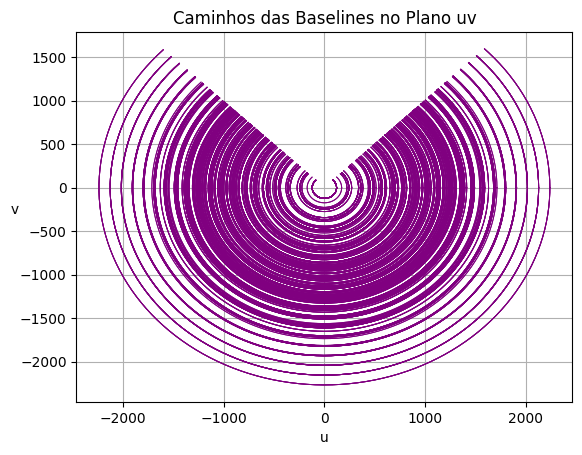

In [9]:
# Hidrogênio neutro (~21 cm) -> centro da banda analizada:
Lambda = 0.21
# 'Phase center' a 0 graus horários e 45 graus de inclinação:
H0 = 0
delta0 = np.pi/2 * 0.9 #era pi/4

# Parâmetro das equações paramétricas da elipse:
t = np.linspace(0, 2*np.pi, 500)

# Limitando a elipse a um setor:
limitar = True
if (limitar):
    setor = (t < 0.75 * np.pi) & (t > 0.25 * np.pi)
    t[setor] = np.nan

pnts_amostragem = []
# Plota as elipses parametricamente:
fig, ax = plt.subplots()
for i in range(len(Lx)):
    a = np.sqrt(Lx[i]**2 + Ly[i]**2) / Lambda
    b = a / np.sin(delta0)
    c = (Lz[i] / Lambda) * np.cos(delta0)
    
    u = a * np.cos(t)     # u(t) e v(t). Equações paramétricas da elipse != eixos u e v do plano uv.
    v = b * np.sin(t) + c

    elipse,  = ax.plot(u, v, color='purple', linewidth=0.7)
    u_elipse = elipse.get_xdata()
    v_elipse = elipse.get_ydata()
    for j in range (len(u_elipse)):
        pnts_amostragem.append((u_elipse[j],v_elipse[j]))

ax.set_xlabel('u')
ax.set_ylabel('v', rotation=1)

plt.title('Caminhos das Baselines no Plano uv')
plt.grid(True)
plt.show()

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    <h2>
        2 - A Função de Visibilidade
    </h2>
    <h4>
        2.1 - Elaboração de Fontes Artificiais
    </h4>
    <p style="text-indent: 2em;">
        Antes de proceder com a medida da visibilidade, precisamos definir uma fonte de radiação. Para tal finalidade, o usuário pode escolher a função de intensidade observada <i>I</i> (l,m) abaixo, seja matematicamente ou por um arquivo de imagem. Feito isso, o processo pode aderir-se aos passos de síntese de imagem comuns, onde <i>V</i> (u,v) é utilizado com a distribuição de amostragem <i>S</i> (u,v) para obter a 'dirty image' (imagem suja), a qual pode ser deconvoluída com o 'dirty beam' para aproximar a intensidade verdadeira <i>I</i>(l,m).
</div>

In [10]:
# Fonte matemática simulado no plano (l, m)
T = lambda x, y, sigma: np.e**(-np.sqrt(x**2 + y**2)/(2*sigma**2))

scan_lm = 0.1 # Área do plano lm que é escaneada. lm -> (-1 , 1) e scan é feito de -0.1 a 0.1.
res = 40

l0 = np.linspace(-scan_lm, scan_lm, res) # l0 e m0 denotaram os eixos l e m da fonte matemática.
m0 = np.linspace(-scan_lm, scan_lm, res)
L0, M0 = np.meshgrid(l0, m0)             # Meshgrid da fonte matemática.

intensidades_mat = T(L0, M0, 0.13)

# Fonte imagem:
imagem = Image.open("teste.jpeg") # Caminho do arquivo da fonte. Recomenda-se usar um .jpeg em vez de um .png
largura, altura = imagem.size

# Passagem de valores RGB nas coordenadas da imagem para valores de 'brilho' no plano lm:
pixels = imagem.load()
intensidades_img = []
for y in range(altura):
    for x in range(largura):
        pixel = pixels[x, altura - y - 1]
        intensidade = np.mean(pixel)
        intensidades_img.append(intensidade)


l1 = np.linspace(-scan_lm, scan_lm, largura) # l1 e m1 denotaram os eixos l e m da fonte imagem.
m1 = np.linspace(-scan_lm, scan_lm, altura )
L1, M1 = np.meshgrid(l1,m1) # Meshgrid da fonte imagem.

intensidades_img = np.array(intensidades_img).reshape(altura, largura)

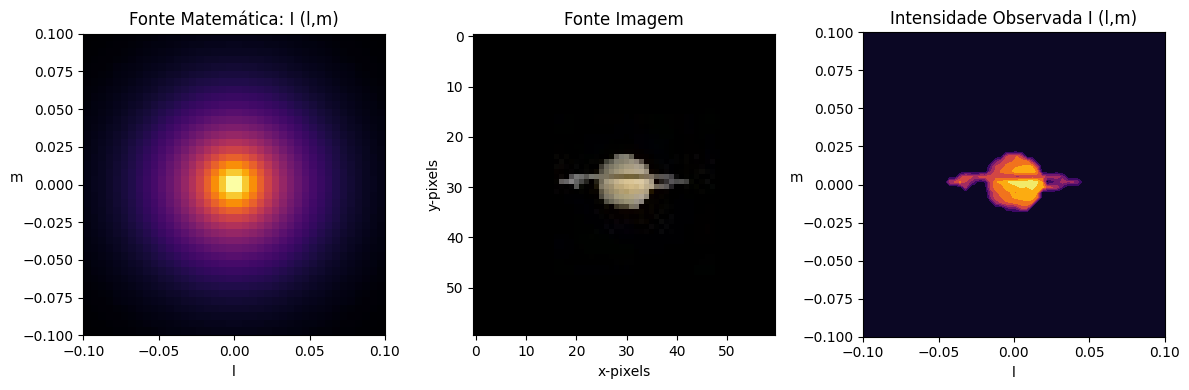

In [11]:
# Plot das fontes
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(intensidades_mat, cmap='inferno',
           extent=[-scan_lm, scan_lm, -scan_lm, scan_lm],
           origin='lower')
axs[0].set_title("Fonte Matemática: I (l,m)")
axs[1].imshow(imagem)
axs[1].set_title("Fonte Imagem")
axs[1].set_xlabel('x-pixels')
axs[1].set_ylabel('y-pixels')
axs[2].contourf(L1, M1, intensidades_img, origin = 'upper', cmap='inferno')
axs[2].set_title("Intensidade Observada I (l,m)")
for i in [0, 2]:
    axs[i].set_xlabel('l')
    axs[i].set_ylabel('m', rotation=1)
plt.tight_layout()
plt.show()

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    <h4>
        2.2 - A Função de Visibilidade
    </h4>
    <p style="text-indent: 2em;">
        Imposta a intensidade da fonte simulada e dados os pontos de amostragem obtidos na seção 1, é possível calcular a visibilidade. A função de visibilidade é relacionada à intensidade da fonte pela seguinte Transformada de Fourier:
</div>

$$V(u,v) = \iint I(l,m)\, e^{-2\pi i (ul + vm)}\, dl\, dm$$

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    Teoricamente, essa integral é tomada em todo o plano uv, para que seu resultado seja multiplicado à distribuição de amostragem <i>S</i>(u,v) no integrando da operação da 'dirty image'. Contudo, visto que serão utilizadas aproximações discretas* para esse cálculo, tal sequência de operações pode ser dispensada e passa a ser conveniente obter uma 'visibilidade amostrada' que já codifica a informação de <i>S</i> (u, v):
</div>

$$V_s(u_k, v_k) \approx \sum_{i,j} I(l_i, m_j) \, e^{-2\pi i (u_k l_i + v_k m_j)} \, \Delta l \Delta m$$

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">

<b>* NOTA: </b>Evidentemente, essa computação requer um número expressivo de operações. Na subseção seguinte, é comentado por que um algoritmo de integal tão lento é utilizado. Por enquanto, basta atentar-se que há um compromisso da resolução de amostragem, da resolução dos planos e do número de antenas no arranjo (e consequentemente a nitidez da imagem final) com o tempo de execução das transformadas.
</div>

In [12]:
# Visibilidade da fonte matemática:
delta_l = l0[1] - l0[0]
delta_m = m0[1] - m0[0]

visibilidades_mat = []

l0_matrix = np.broadcast_to(l0, (len(l0), len(l0)))
m0_matrix = np.broadcast_to(m0, (len(m0), len(m0)))
m0_matrix = np.transpose(m0_matrix)

for ponto in pnts_amostragem:
    visibilidade = np.sum((intensidades_mat * np.exp(-2j * np.pi * 
                                (ponto[0] * l0_matrix + ponto[1] * m0_matrix))
                                * delta_l * delta_m))
    visibilidades_mat.append(visibilidade)


In [13]:
# Fonte imagem:
delta_l = l1[1] - l1[0]
delta_m = m1[1] - m1[0]
 
visibilidades_img = []

l1_matrix = np.broadcast_to(l1, (len(l1), len(l1)))
m1_matrix = np.broadcast_to(m1, (len(m1), len(m1)))
m1_matrix = np.transpose(m1_matrix)

for ponto in pnts_amostragem:
    visibilidade = np.sum((intensidades_img * np.exp(-2j * np.pi * 
                                (ponto[0] * l1_matrix + ponto[1] * m1_matrix))
                                * delta_l * delta_m))
    visibilidades_img.append(visibilidade)

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    <h2>
        3 - Síntese da Imagem
    </h2>
    <h4>
        3.1 - A 'Dirty Image'
    </h4>
    <p style="text-indent: 2em;">
        A operação final envolve a obtenção da "dirty image" ("imagem suja"). Essa imagem é obtida através da visibilidade amostrada recentemente obtida (aqui V<sub>s</sub> denota a visibilidade amostrada, mas como foi levantado anteriormente, o integrando dessa transformada geralmente é <i>V </i>(u, v)<i>S </i>(u, v) multiplicado à exponencial da transformada abaixo), fazendo-se 
</div>

$$I_{D}(l,m) = \iint V_{s}(u,v)\, e^{2\pi i (ul + vm)}\, dl\, dm .$$

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
        As duas maneiras comuns de resolver essa transformada numericamente, são a de interpolação seguida de FFT e a de 'Direct Fourier Transform' (DFT). A primeira requer a disposição regular de dados relacionados ao posicionamento das antenas no plano uv e é geralmente indicada para situações nas quais quantidades elevadas de dados são considerados. A segunda é uma avaliação a 'força bruta' do somatório:
</div>

$$ \frac{1}{M} \sum_{k=1}^{M} V_{s}(u_k, v_k) e^{2\pi i (u_k l + v_k m)} $$

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 20px;">
    <p style="text-indent: 2em;">
        Nos piores casos, esse algoritmo apresenta complexidade na ordem de O(N^4). Ainda que isso seja indesejável, o processo de interpolação e a complexidade adicional do método da FFT favorecem a DFT. Diante disso, é razoável utilizar esse método de somas para esta simulação.
    <div>NOTA: Em geral, M seria igual a res x res ou no caso da imagem, altura x largura. Porém, como limitamos a elipse usando conversões para 'nan' do numpy, apenas os valores não excluídos entram na consideração de M.
    </div>
</div>

In [14]:
# Essa função calcula um píxel ou um célula da grade da dirty image:
ld = np.linspace(-scan_lm, scan_lm, res)
md = np.linspace(-scan_lm, scan_lm, res) # talvez seja desnecessário
LD, MD = np.meshgrid(ld, md)

# Vs: lista de visibilidades amostradas, uv: pontos no plano uv onde são calculadas a dirty image,
# pnt_l e pnt_m: coordenadas do píxel da dirty image no plano lm.
def pixel_dirty_image(Vs, u, v, pnt_l, pnt_m):
    Vs[np.isnan(Vs)] = 0
    u[np.isnan(u)] = 0
    v[np.isnan(v)] = 0
    
    Id_pixel = np.sum(Vs * np.exp(2j*np.pi * (u * pnt_l + v * pnt_m)))
    val_integrado = np.sum(np.exp(2j*np.pi * (u * pnt_l + v * pnt_m)))
    
    vals_validos = np.min([np.count_nonzero(Vs), np.count_nonzero(u), np.count_nonzero(v)])
    
    if vals_validos > 0:
        Id_pixel /= vals_validos
        
    else:
        Id_pixel = 0

    return Id_pixel, val_integrado

In [15]:
# Dirty image da fonte matemática:
dirty_im_mat = []
dirty_beam_mat = []

u = np.array([pnts_amostragem[i][0] for i in range(len(pnts_amostragem))])
v = np.array([pnts_amostragem[i][1] for i in range(len(pnts_amostragem))])
visibilidades_mat = np.array(visibilidades_mat)

# Loop para calcular cada píxel da dirty image:
for i in range(res):
    for j in range(res):
        dirty_image, dirty_beam = pixel_dirty_image(visibilidades_mat, u, v, LD[i][j], MD[i][j])
        dirty_im_mat.append(dirty_image)
        dirty_beam_mat.append(dirty_beam)

dirty_im_mat = np.array(dirty_im_mat).reshape(res, res)
dirty_beam_mat = np.array(dirty_beam_mat).reshape(res, res)

In [16]:
# Dirty image da fonte imagem:
dirty_im_img = []
dirty_beam_img = []

visibilidades_img = np.array(visibilidades_img)

for i in range(largura):
    for j in range(altura):
        dirty_image, dirty_beam = pixel_dirty_image(visibilidades_img, u, v, L1[i][j], M1[i][j])
        dirty_im_img.append(dirty_image)
        dirty_beam_img.append(dirty_beam)

dirty_im_img = np.array(dirty_im_img).reshape(altura, largura)
dirty_beam_img = np.array(dirty_beam_img).reshape(altura, largura)

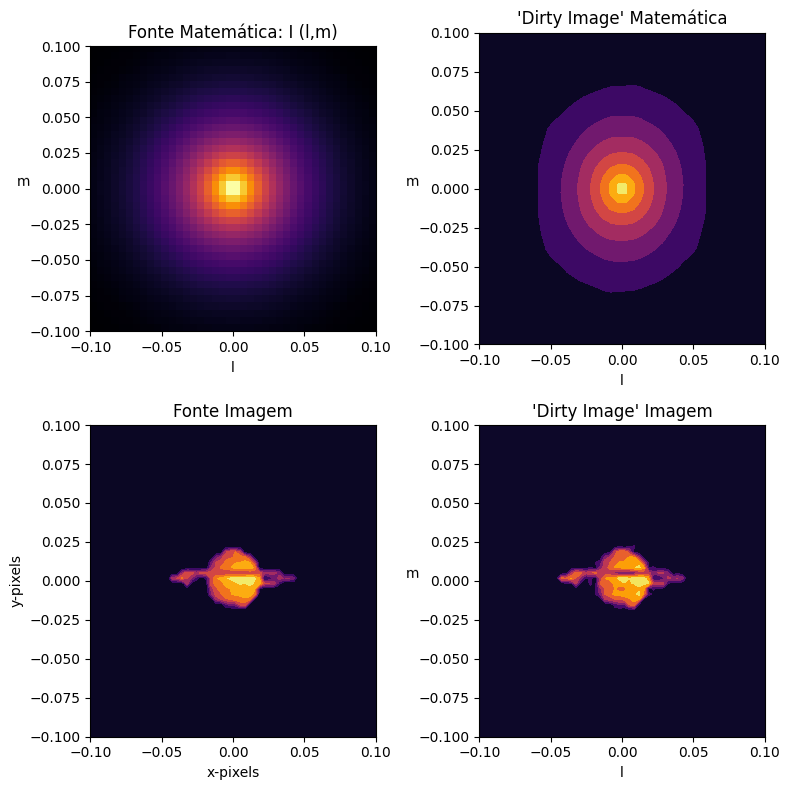

In [18]:

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0][0].imshow(intensidades_mat, cmap='inferno', extent=[l1[0], l1[-1], m1[0], m1[-1]], origin='lower')
axs[1][0].contourf(L1, M1, intensidades_img, origin = 'upper', cmap='inferno')
axs[0][1].contourf(LD, MD, np.abs(dirty_im_mat), cmap='inferno')
axs[1][1].contourf(L1, M1, np.abs(dirty_im_img), cmap='inferno')
for i in range(2):
    for j in range(2):
        if ((i, j) == (0, 0)): axs[i][j].set_title("Fonte Matemática: I (l,m)")
        if ((i, j) == (0, 1)): axs[i][j].set_title("'Dirty Image' Matemática")
        if ((i, j) == (1, 0)): axs[i][j].set_title("Fonte Imagem")
        if ((i, j) == (1, 1)): axs[i][j].set_title("'Dirty Image' Imagem")
        if ((i, j) != (1, 0)):
            axs[i][j].set_xlabel('l')
            axs[i][j].set_ylabel('m', rotation=1)
        else:
            axs[1][0].set_xlabel('x-pixels')
            axs[1][0].set_ylabel('y-pixels')
plt.tight_layout()
plt.show()

<div style="text-align: left; font-family: 'Cambria Math', 'STIX Math', 'Latin Modern Math', serif; font-size: 24px;">
            Fontes:
        <ul>
            <li> 'CORNWELL, T. J. Synthesis Imaging in Radio Astronomy II. In: TAYLOR, G. B.; CARILLI, C. L.; PERLEY, R. A. (eds.). San Francisco: ASP Conference Series, v. 180, 1999.</li>
            <li>M.Born; E. Wolf (1999). Princípios de Óptica (7ª ed.).Cambridge University Press.ISBN 978-0-521-64222-4.</li>
            <li>Katherine Creath; E. WOLF, PROGRESS IN OPTICS XXVl ⓒ ELSEVIER SCIENCE PUBLISHERS B.V., 1988. V Phase-Measurement Interferometry Techniques.WYKO Corporation 1955 East Sixth St., Tucson, AZ 85719, USA</li>
            <li>P. HARIHARAN; Basics of INTERFEROMETRY Second Edition. School of Physics, University of Sydney. Sydney, Australia.</li>
            <li>Sadiku, M. N. O. (2004). Elementos de eletromagnetismo (J. A. Lisboa & L. L. Loder, Trads.). Porto Alegre: Bookman</li>
            <li>An Introduction to Radio Interferometry ©1991 Dale A. Gary - https://www.youtube.com/watch?v=NWARvPvPF-Q&list=LL&index=17</li>
            <li>Interferometry Explained - NRAO - https://public.nrao.edu/interferometry-explained/</li>
        </ul>
    </p>
</div>